# Data Analyst Professional Practical Exam Submission

**You can use any tool that you want to do your analysis and create visualizations. Use this template to write up your summary for submission.**

You can use any markdown formatting you wish. If you are not familiar with Markdown, read the [Markdown Guide](https://s3.amazonaws.com/talent-assets.datacamp.com/Markdown+Guide.pdf) before you start.


## 📝 Task List

Your written report should include written text summaries and graphics of the following:
- Data validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Definition of a metric for the business to monitor  
  - How should the business use the metric to monitor the business problem
  - Can you estimate initial value(s) for the metric based on the current data
- Final summary including recommendations that the business should undertake

*Start writing report here..*

# TASK 1: Data Validation
1. Import pyhton's required libraries for preprocessing
2. Import data
3. Info
4. First 5 row
5. Shape
6. Missing values
7. Data types of columns-checking values
8. Categorizations

In [1]:
#1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as sty
import plotly.express as px
import seaborn as sns
#2
ps = pd.read_csv('product_sales.csv')
#3
ps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [2]:
#4
ps.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [3]:
#5
ps.shape

(15000, 8)

In [4]:
#6
ps.isna().sum()

week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64

In [5]:
#7
print(ps['sales_method'].unique())
print(ps['state'].unique())
print(ps['week'].unique())
print(ps['nb_sold'].unique())
print(ps['years_as_customer'].unique())

['Email' 'Email + Call' 'Call' 'em + call' 'email']
['Arizona' 'Kansas' 'Wisconsin' 'Indiana' 'Illinois' 'Mississippi'
 'Georgia' 'Oklahoma' 'Massachusetts' 'Missouri' 'Texas' 'New York'
 'Maryland' 'California' 'Tennessee' 'Pennsylvania' 'North Dakota'
 'Florida' 'Michigan' 'North Carolina' 'Hawaii' 'Colorado' 'Louisiana'
 'Virginia' 'New Mexico' 'Arkansas' 'Alaska' 'Oregon' 'New Hampshire'
 'Ohio' 'New Jersey' 'Connecticut' 'Iowa' 'Montana' 'Washington'
 'Kentucky' 'Alabama' 'Nebraska' 'South Carolina' 'Minnesota'
 'South Dakota' 'Delaware' 'Maine' 'Utah' 'West Virginia' 'Vermont'
 'Rhode Island' 'Nevada' 'Idaho' 'Wyoming']
[2 6 5 4 3 1]
[10 15 11  9 13  8 12  7 14 16]
[ 0  1  6  3 10  9  7  4  2 20  8  5 17 36 15 14 19 13 12 11 30 24 22 18
 26 23 32 16 39 25 33 21 31 27 34 28 29 35 38 37 63 47]


In [6]:
## Fill all missing values in revenue column with revenue's median
print(ps['revenue'].median())
ps['revenue'] = ps['revenue'].fillna(ps['revenue'].median())
# Check
ps['revenue'].isnull().sum()

89.5


0

In [7]:
ps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            15000 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [8]:
# When printing unique values in the sales_method column there are some duplicates 
# i.e 'em + call' & 'email' we need to fix this categorique values.

ps.loc[ps.sales_method == 'em + call', 'sales_method'] = 'Email + Call'
ps.loc[ps.sales_method == 'email', 'sales_method'] = 'Email'
#Check
print(ps['sales_method'].unique())

['Email' 'Email + Call' 'Call']


In [9]:
# Checking the values in the years_as_customer column
ps['years_as_customer'].value_counts().sort_index()

0     1471
1     2504
2     1987
3     1619
4     1338
5     1118
6      918
7      709
8      608
9      509
10     405
11     318
12     284
13     239
14     167
15     150
16     123
17      88
18      82
19      58
20      54
21      37
22      43
23      21
24      27
25      19
26      22
27      15
28       8
29       5
30       9
31       6
32       5
33       8
34       8
35       5
36       4
37       2
38       2
39       3
47       1
63       1
Name: years_as_customer, dtype: int64

In [10]:
# Checking the values in the years_as_customer column where is longer then 39 years...
ps[ps['years_as_customer'] > 39]

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
13741,2,Email,18919515-a618-430c-9a05-2c7d8fea96af,10,97.22,63,24,California
13800,4,Call,2ea97d34-571d-4e1b-95be-fea1c404649f,10,50.47,47,27,California


In [11]:
# Dropping rows that are outliers i.e longer than 39 'years_as_customer'
ps.drop(ps[ps['years_as_customer'] > 39].index, axis=0, inplace=True)

# Checking to see that they've been removed
print(ps[ps['years_as_customer'] > 39])

Empty DataFrame
Columns: [week, sales_method, customer_id, nb_sold, revenue, years_as_customer, nb_site_visits, state]
Index: []


In [12]:
#Counting values for every state
ps['state'].value_counts().sort_values(ascending=False)

California        1870
Texas             1187
New York           965
Florida            904
Illinois           617
Pennsylvania       598
Ohio               566
Michigan           498
Georgia            489
North Carolina     459
New Jersey         434
Virginia           372
Indiana            354
Tennessee          340
Washington         335
Arizona            321
Missouri           311
Massachusetts      294
Maryland           263
Wisconsin          253
Minnesota          245
Colorado           230
Louisiana          230
Oregon             229
South Carolina     224
Alabama            214
Kentucky           213
Oklahoma           196
Connecticut        179
Iowa               165
Kansas             142
Mississippi        139
Arkansas           132
Utah               124
Nevada             102
Nebraska            91
West Virginia       85
New Mexico          84
Hawaii              72
Maine               63
Idaho               62
New Hampshire       53
Montana             45
Rhode Islan

In [13]:
# Number of States included
ps.state.nunique()

50

In [14]:
#View the head of product_sales dataset
ps.head()

,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,89.50,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,89.50,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [15]:
#Final shape -we drop two outliers customers rows for 63-47 years 
ps.shape

(14998, 8)

## Summary of Data Validation:
Before starting data preprocessing, this dataset had 15000 rows and 8 columns. Here is a summary of each column:

### week: 
This column consists of 6 integers, 1-6. There are no more than 6 values in this column, so it matches the description and doesn't need clearing.
### sales_method: 
The column had 5 non-unique values with no missing values. I replaced the initially given "Email + Call" and "Email" values with "em + call" and "email" values, respectively. After doing that, there are now only 3 options ('Call + Email', 'Call' and 'Email') that align with the description given in sales_method.
### customer_id: 
15000 unique customer IDs that match the given description, without missing values. no cleaning needed.
### nb_sold: 
A column ranging from 7 to 16 with no missing values. It matches the description, no need to clean.
### revenue: 
There were 1,074 missing values in this column. These values were filled with the median of the column.
### years_as_customer: 
There were 2 outliers in the years_as_customer column. The 'Pens and Printers' business has only existed for about 39 years. Therefore, the values 47 and 63 in this column are two bad data that do not match the age of the institution. It had to be removed for that. I dropped these 2 lines as seen above.
### nb_site_visits: 
A set of integers with no missing data. It corresponds to the description and does not need a cleaning.
### state: 
Character values without missing values, 50 unique values. No cleaning is need.

### In the data set, changes were made according to the categoricality of the values in the columns and the data type. Removed 2 rows in 'years_as_customer' column. The data in the 'revenue' column containing 1074 missing values are filled with the median value(89.5). The final version of our data consists of 14998 rows and 8 columns.

# TASK 2: Data Exploration and Analyses
## 1. How many customers were there for each approach?

In [16]:
# Checking customers' sum for each aproach at sales_method column
ps['sales_method'].value_counts()

Email           7465
Call            4961
Email + Call    2572
Name: sales_method, dtype: int64

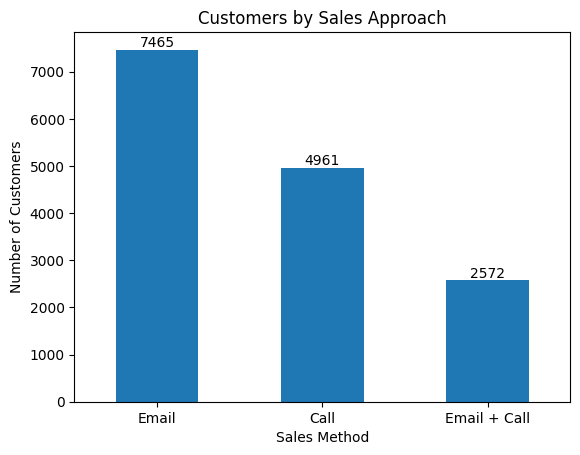

In [17]:
#Barplot with number of customers for Each Sales Approach
ax = ps.sales_method.value_counts().plot(kind="bar")
ax.set_title("Customers by Sales Approach")
ax.set_xlabel("Sales Method")
ax.set_ylabel("Number of Customers")
for i in ax.containers:
    ax.bar_label(i, label_type="edge", fontsize=10)
plt.xticks(rotation=0)
plt.show()

## According to the bar chart, the most sales were made by Email (6,921), followed by Call (4,780) and Email + Call (2,223), respectively. I added the numbers above each method in order to compare the different sales_methods more easily and to follow the bars numerically quickly.

## 2. What does the spread of revenue look like overall? And for each method?

In [18]:
#Defining functions of the all visulation with their args.
#Box
def box_plot(data, x_arg, y_arg, title, x_label, y_label):
    sns.boxplot(data=data, x=x_arg, y=y_arg)
    
    plt.title(title, size=12, weight='bold')
    plt.xlabel(x_label, size=10, weight='bold')
    plt.ylabel(y_label, size=10, weight='bold')
    
    sns.despine()
    plt.show()

In [19]:
#Histogram
def hist_plot(data, x_arg, title, x_label, y_label, bin_size):
    
    sns.histplot(data=data, x=x_arg, bins=bin_size)
    
    # set plot title and axis labels
    plt.title(title, size=12, weight='bold')
    plt.xlabel(x_label, size=10, weight='bold')
    plt.ylabel(y_label, size=10, weight='bold')
    
  
    sns.despine()
    plt.show()

In [20]:
# Defining Univariate Plot Function
def plot(kind, data, x_arg, y_arg, hue, title, x_label, y_label, color, marker_):
    
    if kind == sns.lineplot:
        kind(data = data, x = x_arg, y = y_arg, hue = hue, color = color, marker = marker_)
        plt.title(title, size=12, weight = 'bold')
        plt.xlabel(x_label, size = 10, weight = 'bold')
        plt.ylabel(y_label, size = 10, weight = 'bold')
        
    elif kind == sns.barplot:
        ax = kind(data = data, x = x_arg, y = y_arg, hue = hue, color = color)
        plt.title(title, size=12, weight='bold')
        plt.xlabel(x_label, size=10, weight='bold')
        plt.ylabel(y_label, size=10, weight='bold')
        for p in ax.patches:
            ax.annotate('{:.3f}%'.format((p.get_height()/data['revenue'].sum() * 100)), (p.get_x()+0.2, p.get_height()+1),
                        ha = 'left', va='bottom', size='12')
            
    else:
        kind(data=data, x = x_arg, y = y_arg, hue = hue, color = color)
        plt.title(title,size = 12, weight = 'bold')
        plt.xlabel(x_label, size = 10, weight = 'bold')
        plt.ylabel(y_label, size = 10, weight = 'bold')

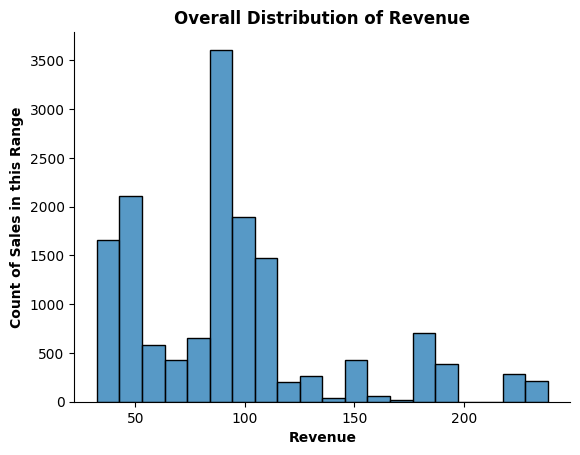

In [21]:
# Creating a Histogram to Visualize the Overall Spread of Revenue
hist_plot(data=ps, x_arg='revenue', title = 'Overall Distribution of Revenue', x_label='Revenue', y_label='Count of Sales in this Range', bin_size=20)

## In the above distribution of revenue histogram, we can see that most of the sales are in the 50-90 range and the distribution is particularly concentrated in the 60-90 range. If we compare the distribution of revenues greater than 100 with the part less than 100, there is a noticeable difference.

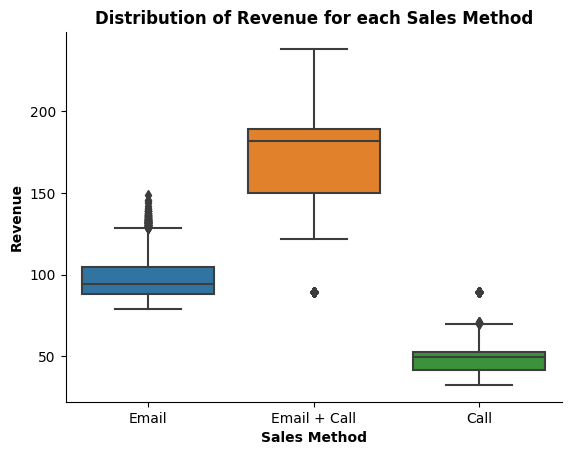

In [22]:
# Creating a Box Plot to Display the Spread of Revenue for Each Sales Method
box_plot(data=ps, x_arg='sales_method', y_arg='revenue', title='Distribution of Revenue for each Sales Method', x_label='Sales Method', y_label='Revenue')

## According to sales_method, when we look at the Boxplot, the email and email+call boxes are located above the value (89.5) where we filled in the blank values at the beginning, while only the call box is located below this value.

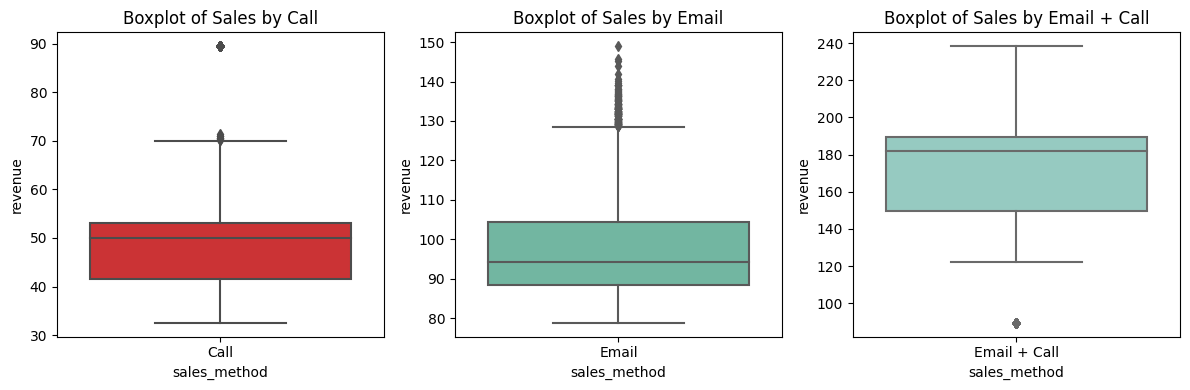

In [23]:
# Boxplots for breakdown of sales by Each Approach
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

sns.boxplot(x='sales_method', y='revenue', data=ps[ps['sales_method'] == 'Call'], ax=axes[0], palette='Set1')
axes[0].set_title('Boxplot of Sales by Call')
sns.boxplot(x='sales_method', y='revenue', data=ps[ps['sales_method'] == 'Email'], ax=axes[1], palette='Set2')
axes[1].set_title('Boxplot of Sales by Email')
sns.boxplot(x='sales_method', y='revenue', data=ps[ps['sales_method'] == 'Email + Call'], ax=axes[2], palette='Set3')
axes[2].set_title('Boxplot of Sales by Email + Call')
fig.tight_layout()
plt.show()

## From these side-by-side box plots, looking at the range of revenue amounts for the "Call" sales method, we can say that this method is the least productive. It is only between 35-70 and this is much lower than other sales.

Revenue generated per approach:
sales_method
Call            243712.52
Email + Call    439492.19
Email           720908.61
Name: revenue, dtype: float64


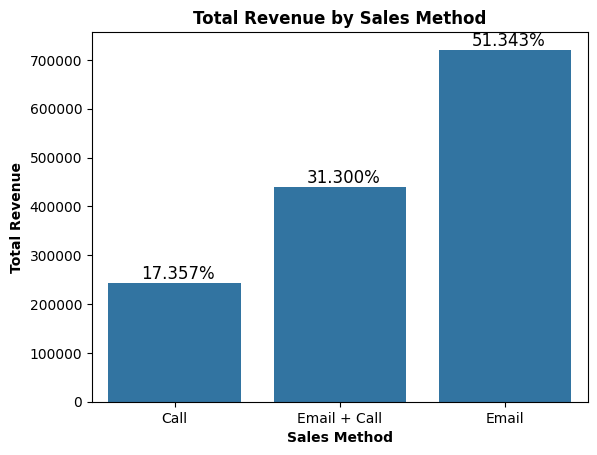

In [24]:
groupby_method = ps.groupby('sales_method')['revenue'].sum().sort_values()
print(f"Revenue generated per approach:\n{groupby_method}")
plot(sns.barplot, ps, groupby_method.index, groupby_method, None, 'Total Revenue by Sales Method',
     'Sales Method', 'Total Revenue', sns.color_palette()[0], None)

## We can clearly see why the call method is responsible for such a small percentage of the total revenue. While the Call method is 18%, the Call+Email method is 31%, the Email method is at the top with 51%. However, it is a remarkable finding for the Email method that it is more than the sum of the other two methods.

## 3. Was there any difference in revenue over time for each of the methods?

week  sales_method
1     Call             27770.18
      Email           246681.05
      Email + Call     18406.83
2     Call             36477.02
      Email           147549.85
      Email + Call     28971.73
3     Call             39290.27
      Email           106399.64
      Email + Call     51869.64
4     Call             53213.02
      Email           115395.87
      Email + Call     83845.20
5     Call             56829.61
      Email            79743.45
      Email + Call    136744.22
6     Call             30132.42
      Email            25138.75
      Email + Call    119654.57
Name: revenue, dtype: float64


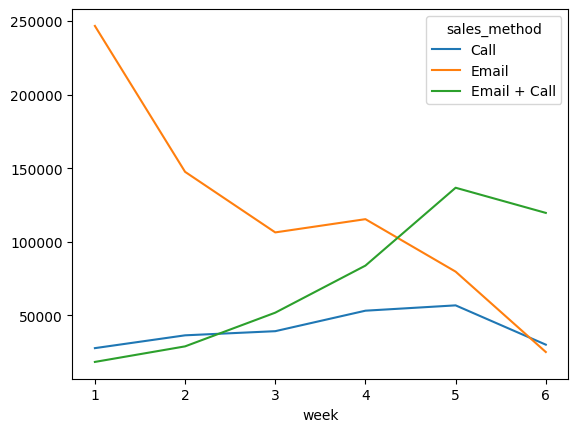

In [25]:
revenue_sum = ps.groupby(['week', 'sales_method'])['revenue'].sum()
revenue_sum.unstack().plot()
print(revenue_sum)

By plotting the data on a line chart, we can see that the Email sales method produced the highest revenue in first week, where it started at 246681 USD and only decreased as the weeks passed. Over the next 2 weeks, revenue from the email approach was down more than 50% to 106399 USD. We can also see that E-mail + Call started much lower than the pure e-mail approach, while closing the period higher than all of them, reaching the top at the end of the series. Based on this increasing trend, this approach appears to be the most successful. If I want to choose one of these three methods, I would prefer the email-call method. Up until week 6 it seemed to get higher each week than the previous one, but I think this should be observed for longer. Finally, the pure "Call" approach started low and ended low in revenue generation. There was little or no change in revenue from this approach. I can say that this method is the unsuccessful method among them. And it seems like the way to go to stay in the forefront of the customer's mind may be either Emailing only or Emailing and Searching. If we interpret this according to the week, it is noteworthy that the trends of these two methods intersect and break in different directions in the 4th week. And the evaluation of these two methods every 4 weeks may herald a step that will affect sales more positively.

## 4. Based on the Data, which method would you recommend we continue to use?

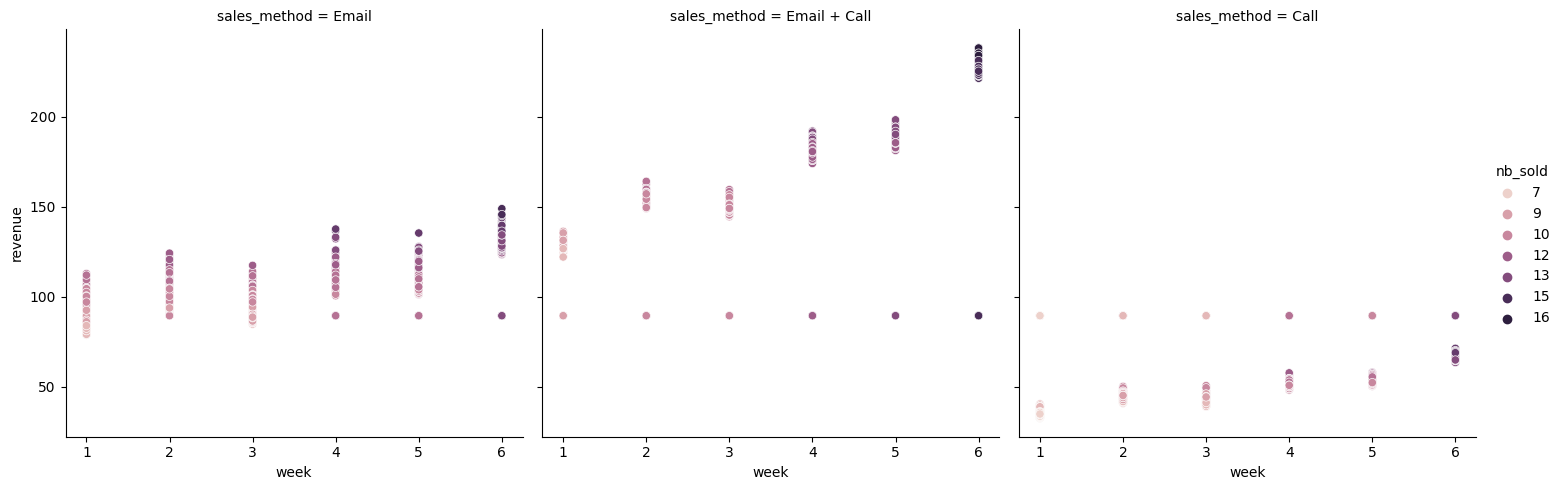

In [26]:
#New product sold and revenue graph for each sales method by week
sns.relplot(
    data=ps, x="week", y="revenue",
    col="sales_method", hue="nb_sold",
    kind="scatter"
) 

## When we examine the chart above, we can interpret the sales by week, separated by three different methods, and the sales of new products in detail. This visualization allows us to further elaborate on the comments we made in the previous charts. Accordingly, with the email method, the email+call method is obviously much better than the call method. In fact, the email+call method has reached high values in both revenue and newly sold products in recent weeks. This is in line with our interpretations of our previous univariate plots.

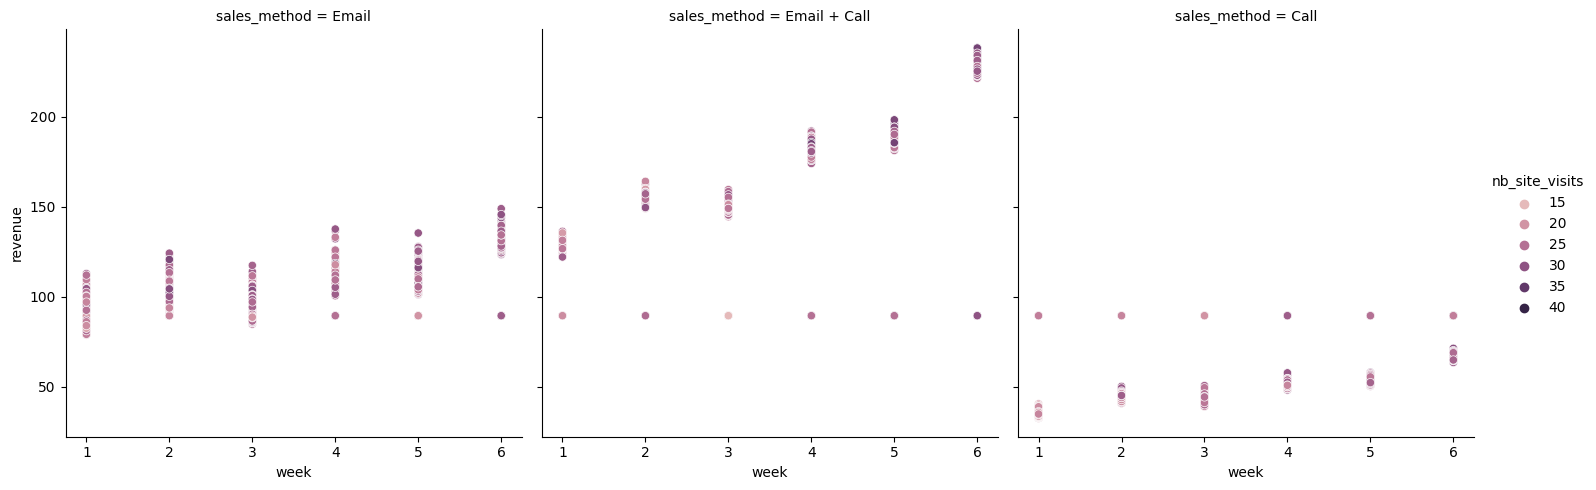

In [27]:
#Graph of customer site visits and revenue for each sales method by week
sns.relplot(
    data=ps, x="week", y="revenue",
    col="sales_method", hue="nb_site_visits",
    kind="scatter"
)

## When we look at this graph, we can analyze the weekly sales in three different ways and this time we can interpret it in detail according to the site visits. This visualization also supports the comments we made in the previous charts. We can make the following comment regarding the last two graphics. While only the email method received revenue values between 80-150 in both new product sales and site visits, the email+call method reached the highest values (100-250) in both new product sales and site visits, especially towards the last weeks. Here, it can be deduced that the customer visits the site more with the email method. But we see that the actions of the customers reach higher revenue and new product sales with both email and call.

In [28]:
#Correlation of Call as sales method with other numeric data type columns 
#except years_as_customers column
ps1 = ps.drop('years_as_customer',axis=1, inplace=False)
corr_matrix_call = ps1[ps1['sales_method']=='Call'].corr()
print(corr_matrix_call)

                    week   nb_sold   revenue  nb_site_visits
week            1.000000  0.909476  0.684904        0.479485
nb_sold         0.909476  1.000000  0.725895        0.515548
revenue         0.684904  0.725895  1.000000        0.372631
nb_site_visits  0.479485  0.515548  0.372631        1.000000


In this sales method ('Call'), there is a strong positive relationship between the number of new products sold and weeks and sales.

In [29]:
#Correlation of Email as sales method with other numeric data type columns 
#except years_as_customers column
corr_matrix_email = ps1[ps1['sales_method']=='Email'].corr()
print(corr_matrix_email)

                    week   nb_sold   revenue  nb_site_visits
week            1.000000  0.779338  0.757046        0.320753
nb_sold         0.779338  1.000000  0.913485        0.374184
revenue         0.757046  0.913485  1.000000        0.355184
nb_site_visits  0.320753  0.374184  0.355184        1.000000


In this sales method ('E-mail'), too, there is a strong positive relationship between the number of new products sold and weeks and sales.

In [30]:
#Correlation of Email+Call as sales method with other numeric data type columns 
#except years_as_customers column
corr_matrix_emailcall = ps1[ps1['sales_method']=='Email + Call'].corr()
print(corr_matrix_emailcall)

                    week   nb_sold   revenue  nb_site_visits
week            1.000000  0.936026  0.528864        0.458056
nb_sold         0.936026  1.000000  0.552262        0.472189
revenue         0.528864  0.552262  1.000000        0.265242
nb_site_visits  0.458056  0.472189  0.265242        1.000000


In this sales method ('email+call'), there is a very strong positive relationship between the number of new products sold and the weeks. However, I cannot say the same for revenue.

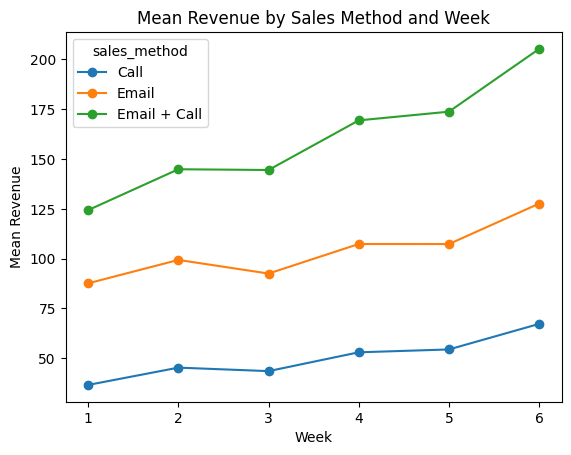

In [31]:
rev_avg_week = ps.groupby(['week', 'sales_method'])['revenue'].mean()
rev_avg_week = rev_avg_week.unstack(level='sales_method')
rev_avg_week.plot(kind='line', marker='o')
plt.title('Mean Revenue by Sales Method and Week')
plt.xlabel('Week')
plt.ylabel('Mean Revenue')
plt.show()

In [32]:
# average weekly revenue for each sales method
ps.groupby('sales_method')['revenue'].mean().to_frame()

,revenue
sales_method,
Call,49.125684
Email,96.571816
Email + Call,170.875657


Based on the data and charts above, I would recommend this organization move away from the Call approach as it produces the worst results of all sales methods. The blue line shows the minimum ROI of a busy Call approach. Additionally, the 'Call' approach is seen as very time consuming as the average time spent on the phone is around ~30 minutes per customer. The call could easily be completed by adding emails that provided and shared key product insights, and required very little work from the team. That's why I recommend that the team double down on the Call + Email approach and make their email content engaging, especially every four weeks with trend breaks.

In this way, the call+e-mail method will be more efficient both for the institution and for the employees.

# TASK 3: Definition of a metric for the business to monitor
## 5. Business Metric to Monitor

In [33]:
# Pivot Table of Mean & Median for each Sales Method across the 6 week period
ps.groupby(['week', 'sales_method'])['revenue'].agg(['mean', 'median']).unstack().style.background_gradient()

In [34]:
# Highlighting the maximum amounts for each week
ps.groupby(['week', 'sales_method'])['revenue'].agg(['mean']).unstack().style.highlight_max(axis=1, color='lightgreen').highlight_min(axis=1, color='pink')

In [35]:
# Highlighting the maximum newly sales of product for each week
ps.groupby(['week', 'sales_method'])['nb_sold'].agg(['mean']).unstack().style.highlight_max(axis=1, color='lightgreen').highlight_min(axis=1, color='pink')

In [36]:
# Highlighting the maximum customer site visit for each week
ps.groupby(['week', 'sales_method'])['nb_site_visits'].agg(['mean']).unstack().style.highlight_max(axis=1, color='lightgreen').highlight_min(axis=1, color='pink')

## Since the company is focused on increasing revenue and profits by selling more products, I recommend focusing on the average weekly revenue metric from each method as the main performance indicator.
## 
## When the weekly average site visits of the customers and the average new product sales are compared with the average sales values, I can say that there are more significant differences in the average sales values. And I think this metric would be the best metric to consider because it can be measured over time and is regularly reviewed on a weekly basis. can be analyzed, which ensures that if results and sales do not meet their targets, they will return. In the highlighted pivot table, we can clearly see that the "Email + Call" approach generates significantly higher average revenue each week than other approaches.
## 
## Looking at the average weekly revenue per sales method, we can see that the "Email + Call" approach generally tends to increase week to week, with only a slight decrease between weeks 2 and 3 and fully compensated in the following weeks. This was followed by the Email approach with an average of around $128 per sale in Week 6, but this does not come close to the results observed in 'Email + Call'.
## 
## Estimates for the baseline values (Average Revenue per Sales Method per Week) for this metric, focusing on the recommended approach (Email + Call). Contained in the sections: 124.37, 144.86, 144.48, 169.38, 173.75 and 205.24 for weeks respectively.
## 
## By analyzing this recommended average weekly sales revenue metric, we can observe whether this trend continues for the three different approaches.

# TASK 4: Summarizing and Recommendations
## 6. Final Summary & Recommendations

## To summarize what we did:
### Data cleaning:
We deleted two values over 39 years from the data in years_as_customer. We filled 1074 blank values ​​in the income section with the median value.
### Data exploration, processing and visualization:
In the data, we first examined the time-based turnover values according to each sales method. We then validated the comments we made on the first chart, detailing this with the number of new products sold and the customer's site visits.
### Business metric:
By comparing our interpretations of these interpretations in both the correlation and pivot tables with the strength of the interrelationships and the mean values, we found the most striking measure.
### Recommendations:
1. I recommend that the company focus on the 'Email + Call' method due to its success in total average revenue per sale ($170/sales) and steady growth most weeks.
2. I recommend updating the e-mail contents every 4 weeks to make it more interesting. Because we can say that the metrics in the e-mail method cut off the interest of the customers, especially after the 4th week. If the reason for this detail is determined and the "Email+Call" method is optimized with this, I think that it will be more efficient for both the company and its employees, and the customer's interest will be supported by sales. This will contribute positively to sustainable success.

## ✅ When you have finished...
-  Publish your Workspace using the option on the left
-  Check the published version of your report:
	-  Can you see everything you want us to grade?
    -  Are all the graphics visible?
-  Review the grading rubric. Have you included everything that will be graded?
-  Head back to the [Certification Dashboard](https://app.datacamp.com/certification) to submit your practical exam report and record your presentation